In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:

data_one = Path("archive/highest_earning_players.csv")

In [3]:
players = pd.read_csv(data_one)
players.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter


In [4]:
data_two = Path("archive/country-and-continent-codes-list.csv")

In [5]:
countries = pd.read_csv(data_two)
countries.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


In [6]:
countries = countries.rename(columns={'Two_Letter_Country_Code': 'CountryCode'})
countries['Country_Name'] = countries['Country_Name'].replace('United Kingdom of Great Britain & Northern Ireland', 'United Kingdom')
countries = countries[['Continent_Name', 'Country_Name', 'CountryCode']]
countries['Country_Name'] = countries['Country_Name'].str.split(',').str[0]
#drop duplicates

In [7]:
countries

,Continent_Name,Country_Name,CountryCode
0,Asia,Afghanistan,AF
1,Europe,Albania,AL
2,Antarctica,Antarctica (the territory South of 60 deg S),AQ
3,Africa,Algeria,DZ
4,Oceania,American Samoa,AS
...,...,...,...
257,Africa,Zambia,ZM
258,Oceania,Disputed Territory,XX
259,Asia,Iraq-Saudi Arabia Neutral Zone,XE
260,Asia,United Nations Neutral Zone,XD


In [8]:
counts = countries.CountryCode.value_counts()
countries[countries.CountryCode.isin(counts[counts > 1].index)]

,Continent_Name,Country_Name,CountryCode
8,Europe,Azerbaijan,AZ
9,Asia,Azerbaijan,AZ
16,Europe,Armenia,AM
17,Asia,Armenia,AM
58,Europe,Cyprus,CY
59,Asia,Cyprus,CY
83,Europe,Georgia,GE
84,Asia,Georgia,GE
116,Europe,Kazakhstan,KZ
117,Asia,Kazakhstan,KZ


In [9]:
countries = countries.drop_duplicates()

In [10]:
countries

,Continent_Name,Country_Name,CountryCode
0,Asia,Afghanistan,AF
1,Europe,Albania,AL
2,Antarctica,Antarctica (the territory South of 60 deg S),AQ
3,Africa,Algeria,DZ
4,Oceania,American Samoa,AS
...,...,...,...
257,Africa,Zambia,ZM
258,Oceania,Disputed Territory,XX
259,Asia,Iraq-Saudi Arabia Neutral Zone,XE
260,Asia,United Nations Neutral Zone,XD


In [11]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PlayerId       1000 non-null   int64  
 1   NameFirst      1000 non-null   object 
 2   NameLast       1000 non-null   object 
 3   CurrentHandle  1000 non-null   object 
 4   CountryCode    1000 non-null   object 
 5   TotalUSDPrize  1000 non-null   float64
 6   Game           1000 non-null   object 
 7   Genre          1000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [12]:
players['CountryCode'] = players['CountryCode'].str.upper()
players = players.merge(countries, on='CountryCode', how='left')
players['TotalUSDPrize'] = players['TotalUSDPrize'].astype('int64')
players = players.sort_values('TotalUSDPrize', ascending=False).reset_index(drop=True)

In [13]:
players

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre,Continent_Name,Country_Name
0,3304,Johan,Sundstein,N0tail,DK,6952596,Dota 2,Multiplayer Online Battle Arena,Europe,Denmark
1,3822,Jesse,Vainikka,JerAx,FI,6470000,Dota 2,Multiplayer Online Battle Arena,Europe,Finland
2,30451,Anathan,Pham,ana,AU,6000411,Dota 2,Multiplayer Online Battle Arena,Oceania,Australia
3,2811,Sébastien,Debs,Ceb,FR,5554297,Dota 2,Multiplayer Online Battle Arena,Europe,France
4,18897,Topias,Taavitsainen,Topson,FI,5470902,Dota 2,Multiplayer Online Battle Arena,Europe,Finland
...,...,...,...,...,...,...,...,...,...,...
1027,83085,En Hao,Chen,Gua,TW,26666,Arena of Valor,Multiplayer Online Battle Arena,Asia,Taiwan
1028,83083,Yu-Yan,Su,GaDuo,TW,26666,Arena of Valor,Multiplayer Online Battle Arena,Asia,Taiwan
1029,70343,-,-,Rain,TW,26645,Arena of Valor,Multiplayer Online Battle Arena,Asia,Taiwan
1030,12241,Komklit,Wongsawat,O7T-V1,TH,25941,Arena of Valor,Multiplayer Online Battle Arena,Asia,Thailand


In [14]:
summary_df = players.groupby('Game')['TotalUSDPrize'].sum().reset_index()
summary_df = summary_df.sort_values(by='TotalUSDPrize', ascending=False)
summary_df.reset_index(drop=True, inplace=True)
summary_df['Rank'] = range(1, 11)
summary_df = summary_df[['Rank', 'Game', 'TotalUSDPrize']]

In [15]:
summary_df

,Rank,Game,TotalUSDPrize
0,1,Dota 2,185783701
1,2,Counter-Strike: Global Offensive,60843482
2,3,Fortnite,43965382
3,4,League of Legends,35043428
4,5,Starcraft II,25379774
5,6,Hearthstone,14206347
6,7,PUBG,13305540
7,8,Overwatch,12411718
8,9,Heroes of the Storm,11780399
9,10,Arena of Valor,8333904


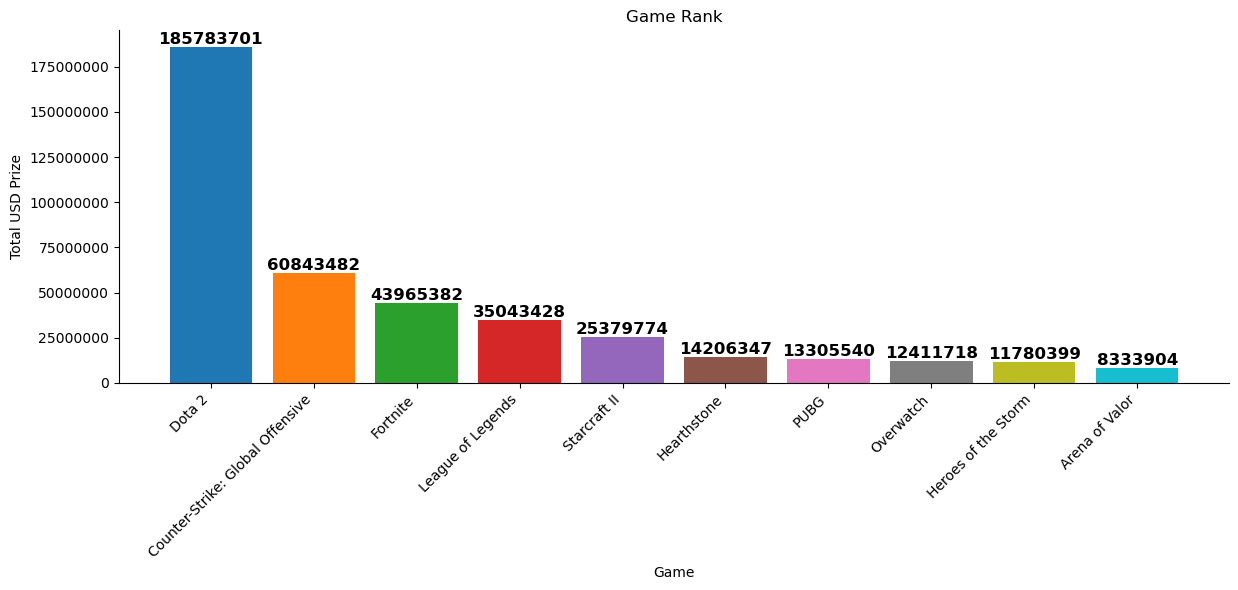

In [16]:
def format_y_axis(value, pos):
    return f'{value:.0f}'
plt.figure(figsize=(12, 6))
colors_1 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

bars = plt.bar(summary_df['Game'], summary_df['TotalUSDPrize'], color=colors_1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, format_y_axis(height, None), ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.xlabel('Game')
plt.ylabel('Total USD Prize')
plt.title('Game Rank')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().yaxis.set_major_formatter(format_y_axis)

In [17]:
country_summary_df = players.groupby('Country_Name')['TotalUSDPrize'].sum().reset_index()
country_summary_df = country_summary_df.sort_values(by='TotalUSDPrize', ascending=False)
country_summary_df.reset_index(drop=True, inplace=True)
country_summary_df['Rank'] = range(1, len(country_summary_df) + 1)
country_summary_df.insert(0, 'Rank', country_summary_df.pop('Rank'))

In [18]:
country_summary_df

,Rank,Country_Name,TotalUSDPrize
0,1,China,72391794
1,2,Korea,58441617
2,3,United States of America,43099336
3,4,Denmark,26840785
4,5,Russian Federation,21645766
5,6,Sweden,20770402
6,7,Finland,18876257
7,8,France,15803220
8,9,Canada,13483633
9,10,Germany,10143165


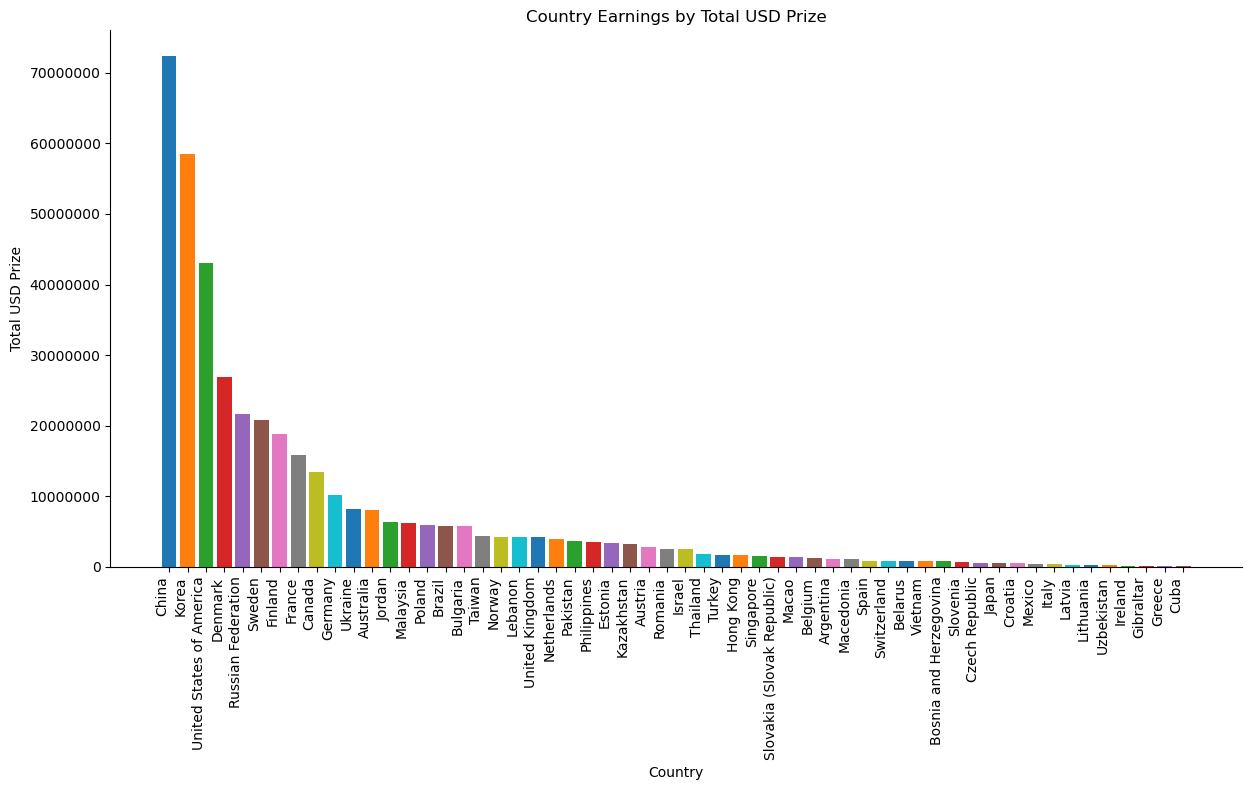

In [19]:
def format_y_axis(value, pos):
    return f'{value:.0f}'
plt.figure(figsize=(12, 8))
colors_2 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

bars = plt.bar(country_summary_df['Country_Name'], country_summary_df['TotalUSDPrize'], color=colors_2)
plt.xlabel('Country')
plt.ylabel('Total USD Prize')
plt.title('Country Earnings by Total USD Prize')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().yaxis.set_major_formatter(format_y_axis)

In [20]:

genre_summary = players.groupby('Genre')['TotalUSDPrize'].sum().reset_index()
genre_summary = genre_summary.sort_values(by='TotalUSDPrize', ascending=False)
genre_summary['Rank'] = range(1, len(genre_summary) + 1)
genre_summary.insert(0, 'Rank', genre_summary.pop('Rank'))


In [21]:
genre_summary

,Rank,Genre,TotalUSDPrize
3,1,Multiplayer Online Battle Arena,240941432
2,2,First-Person Shooter,73255200
0,3,Battle Royale,57270922
4,4,Strategy,25379774
1,5,Collectible Card Game,14206347


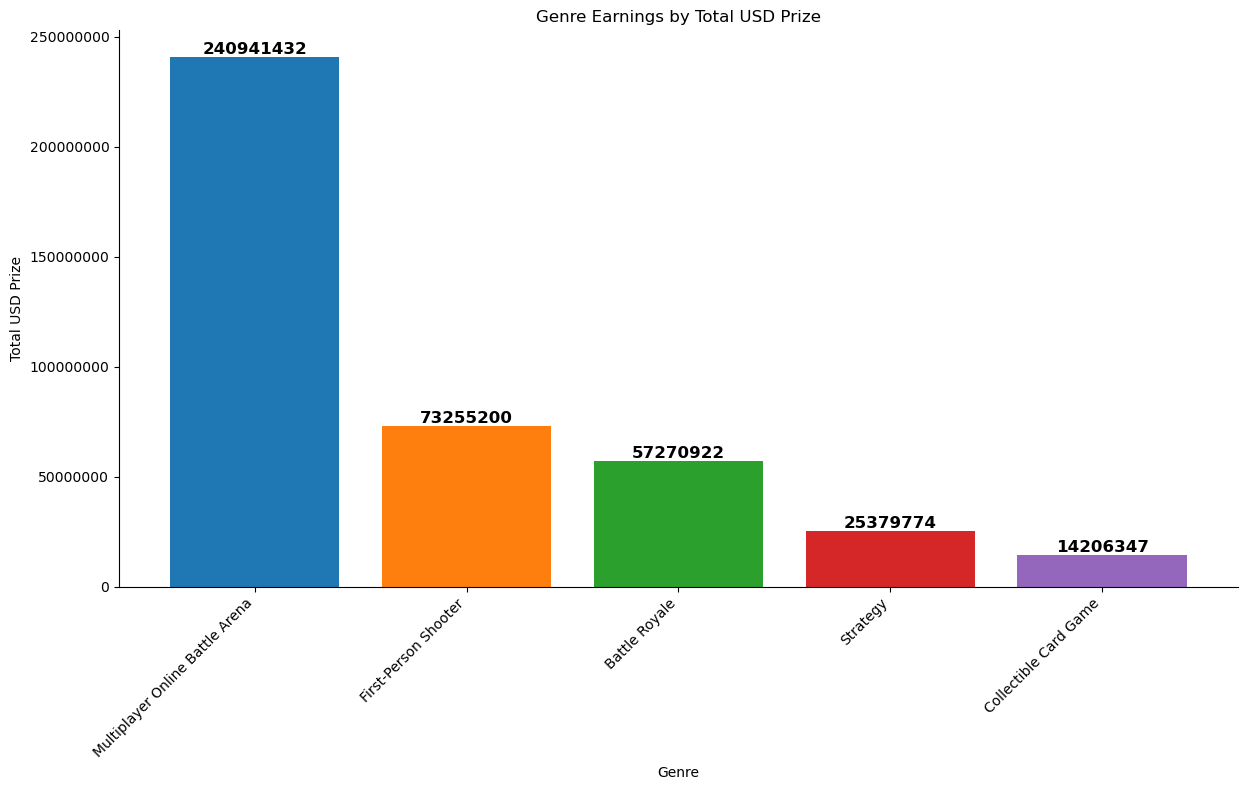

In [44]:
def format_y_axis(value, pos):
    return f'{value:.0f}'
plt.figure(figsize=(12, 8))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Bar plot
bars = plt.bar(genre_summary['Genre'], genre_summary['TotalUSDPrize'], color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, format_y_axis(height, None), ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')


plt.xlabel('Genre')
plt.ylabel('Total USD Prize')
plt.title('Genre Earnings by Total USD Prize')
plt.xticks(rotation=45, ha='right')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.tight_layout()
plt.gca().yaxis.set_major_formatter(format_y_axis)


In [23]:
country_genre_summary = players.groupby(['Country_Name', 'Genre'])['TotalUSDPrize'].sum().reset_index()
country_summary = country_genre_summary.groupby('Country_Name')['TotalUSDPrize'].sum().reset_index()
country_summary['TotalUSDPrize'] = pd.to_numeric(country_summary['TotalUSDPrize'])
country_summary = country_summary.sort_values(by='TotalUSDPrize', ascending=False)
country_summary['Rank'] = range(1, len(country_summary) + 1)


In [24]:
country_genre_summary

,Country_Name,Genre,TotalUSDPrize
0,Argentina,Battle Royale,1021000
1,Argentina,Collectible Card Game,153159
2,Australia,Battle Royale,79049
3,Australia,First-Person Shooter,53759
4,Australia,Multiplayer Online Battle Arena,7866864
...,...,...,...
134,United States of America,Multiplayer Online Battle Arena,11624263
135,United States of America,Strategy,523847
136,Uzbekistan,First-Person Shooter,232167
137,Vietnam,Battle Royale,58725


In [25]:
sorted_country_genre_summary = country_genre_summary.sort_values(by='TotalUSDPrize', ascending=False)

In [26]:
sorted_country_genre_summary
#Add rank idenx

,Country_Name,Genre,TotalUSDPrize
24,China,Multiplayer Online Battle Arena,66502415
70,Korea,Multiplayer Online Battle Arena,25988292
131,United States of America,Battle Royale,21503493
71,Korea,Strategy,17601848
40,Finland,Multiplayer Online Battle Arena,15706271
...,...,...,...
137,Vietnam,Battle Royale,58725
3,Australia,First-Person Shooter,53759
38,Finland,Collectible Card Game,50734
60,Italy,Collectible Card Game,49300


<Figure size 1200x600 with 0 Axes>

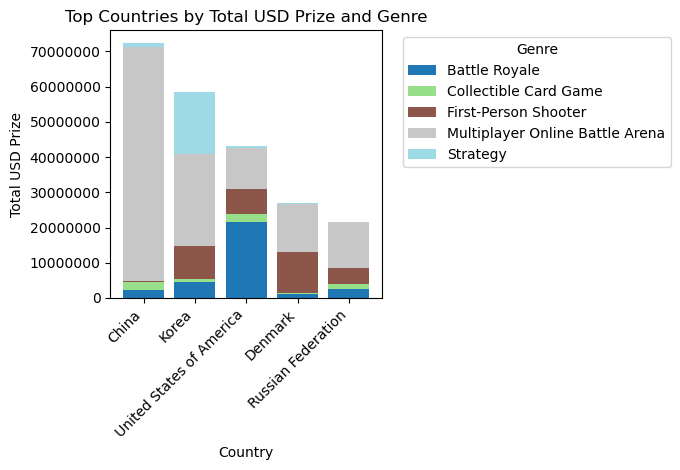

In [27]:
pivot_df = sorted_country_genre_summary.pivot(index='Country_Name', columns='Genre', values='TotalUSDPrize')

# Get the top countries based on total prize
top_countries = pivot_df.sum(axis=1).nlargest(5).index

# Filter the pivot_df to include only the top countries
top_countries_df = pivot_df.loc[top_countries]

# Convert the value from the exponential format to the actual value
def format_y_axis(value, pos):
   
    return f'{value:.0f}'
# Set up the plot
plt.figure(figsize=(12, 6))
top_countries_df.plot(kind='bar', stacked=True, colormap='tab20', width=0.8)

plt.xlabel('Country')
plt.ylabel('Total USD Prize')
plt.title('Top Countries by Total USD Prize and Genre')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(format_y_axis)

plt.show()


In [28]:
# averages for potential analysis 

In [29]:

average_prize_per_country = players.groupby('Country_Name')['TotalUSDPrize'].mean().reset_index()
average_prize_per_country

,Country_Name,TotalUSDPrize
0,Argentina,3.913863e+05
1,Australia,1.599934e+06
2,Austria,9.140737e+05
3,Belarus,3.898145e+05
4,Belgium,2.460346e+05
5,Bosnia and Herzegovina,7.628020e+05
6,Brazil,5.777546e+05
7,Bulgaria,9.568985e+05
8,Canada,3.644225e+05
9,China,4.309035e+05


In [30]:
sorted_average_prize_per_country = average_prize_per_country.sort_values(by='TotalUSDPrize', ascending=False)
sorted_average_prize_per_country = sorted_average_prize_per_country.reset_index(drop=True)
sorted_average_prize_per_country

,Country_Name,TotalUSDPrize
0,Lebanon,4.193412e+06
1,Pakistan,3.608317e+06
2,Jordan,3.165870e+06
3,Estonia,1.685007e+06
4,Australia,1.599934e+06
5,Singapore,1.553261e+06
6,Macao,1.337308e+06
7,Romania,1.239837e+06
8,Israel,1.232344e+06
9,Finland,1.179766e+06


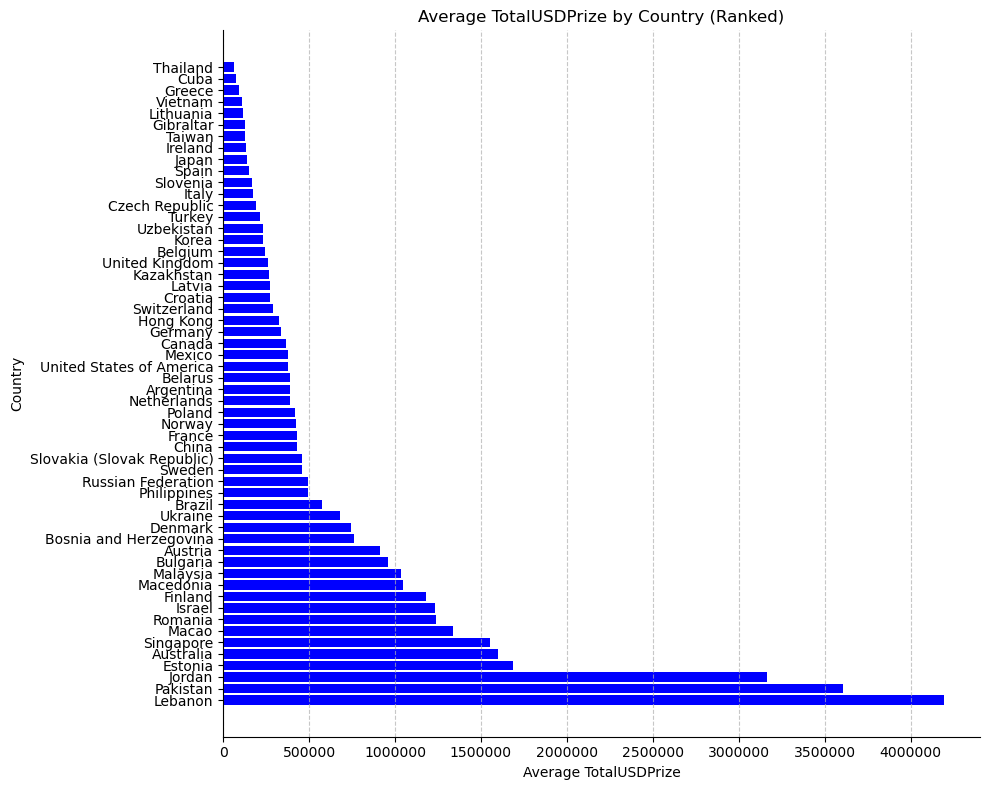

In [31]:
def format_x_axis(value, pos):
    return f'{value:.0f}'
plt.figure(figsize=(10, 8))
plt.barh(sorted_average_prize_per_country['Country_Name'], sorted_average_prize_per_country['TotalUSDPrize'], color='b')

plt.xlabel('Average TotalUSDPrize')
plt.ylabel('Country')
plt.title('Average TotalUSDPrize by Country (Ranked)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_x_axis))

# Show the plot
plt.show()

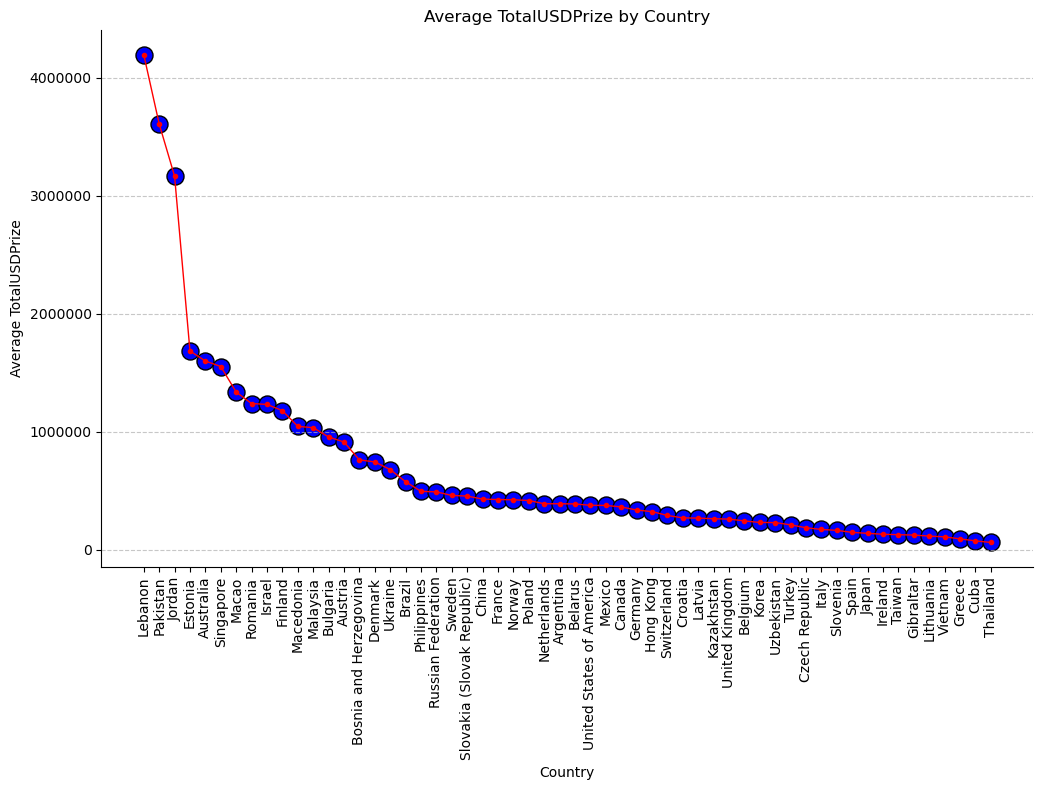

In [32]:
def format_y_axis(value, pos):
    return f'{value:.0f}'
plt.figure(figsize=(10, 8))
plt.scatter(sorted_average_prize_per_country['Country_Name'], sorted_average_prize_per_country['TotalUSDPrize'], color='b', s=150, edgecolors='black', linewidths=1)
plt.plot(sorted_average_prize_per_country['Country_Name'], sorted_average_prize_per_country['TotalUSDPrize'], color='r', marker = '.', linestyle = '-', linewidth=1)
plt.xlabel('Country')
plt.ylabel('Average TotalUSDPrize')
plt.title('Average TotalUSDPrize by Country')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_y_axis))

# Show the plot
plt.show()

In [33]:
#creating a DataFrame of the amount of players for each country
player_count=players.groupby("Country_Name").size()
df_player_counts_all = pd.DataFrame({'Country': player_count.index, 'Player_Count': player_count.values})
df_player_counts_all

,Country,Player_Count
0,Argentina,3
1,Australia,5
2,Austria,3
3,Belarus,2
4,Belgium,5
5,Bosnia and Herzegovina,1
6,Brazil,10
7,Bulgaria,6
8,Canada,37
9,China,168


In [34]:
#Turning the series to a dataframe
filtered_player_count = player_count[player_count > 10][player_count<=100].dropna()
sorted_player_count = filtered_player_count.sort_values(ascending=True)
df_player_counts = pd.DataFrame({'Country': sorted_player_count.index, 'Player_Count': sorted_player_count.values})
df_player_counts

,Country,Player_Count
0,Kazakhstan,12
1,Ukraine,12
2,Poland,14
3,Finland,16
4,United Kingdom,16
5,Thailand,29
6,Germany,30
7,Taiwan,34
8,Denmark,36
9,Canada,37


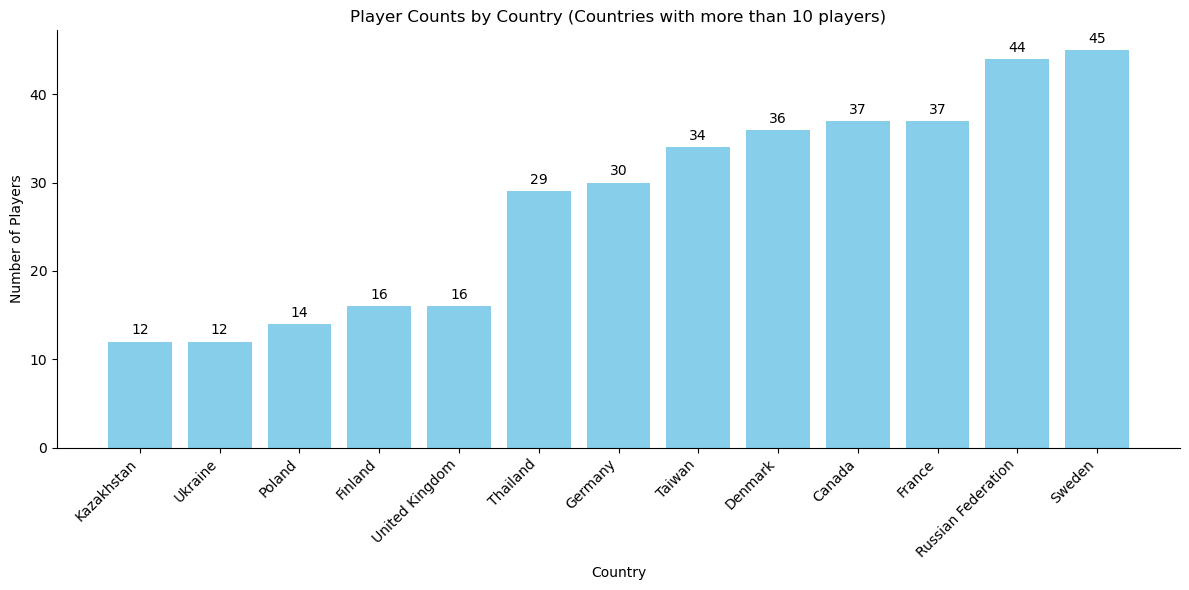

In [35]:
#bar chart visual for amount of players per country
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_player_count.index, sorted_player_count.values, color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.title('Player Counts by Country (Countries with more than 10 players)')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [36]:
#merge player_count with Country
Player_and_Country_df=pd.concat([average_prize_per_country,df_player_counts_all],axis=1,join='inner').sort_values(by='Player_Count',ascending=True)
Player_and_Country_df.drop('Country',axis=1,inplace=True)
Player_and_Country_df

,Country_Name,TotalUSDPrize,Player_Count
34,Mexico,3.771440e+05,1
18,Gibraltar,1.262040e+05,1
42,Singapore,1.553261e+06,1
11,Cuba,7.709200e+04,1
19,Greece,9.407300e+04,1
37,Pakistan,3.608317e+06,1
54,Uzbekistan,2.321670e+05,1
21,Ireland,1.331140e+05,1
29,Lebanon,4.193412e+06,1
5,Bosnia and Herzegovina,7.628020e+05,1


In [37]:
filtered_Player_and_Country=Player_and_Country_df.query("`Player_Count`>=10 and `Player_Count`<=100").sort_values(by='Player_Count',ascending=True)
filtered_Player_and_Country

,Country_Name,TotalUSDPrize,Player_Count
36,Norway,4.251590e+05,10
35,Netherlands,3.914248e+05,10
6,Brazil,5.777546e+05,10
26,Kazakhstan,2.645000e+05,12
51,Ukraine,6.810009e+05,12
39,Poland,4.189312e+05,14
52,United Kingdom,2.615297e+05,16
15,Finland,1.179766e+06,16
49,Thailand,6.365466e+04,29
17,Germany,3.381055e+05,30


In [38]:
country=filtered_Player_and_Country.drop('Player_Count',axis=1)
country

,Country_Name,TotalUSDPrize
36,Norway,4.251590e+05
35,Netherlands,3.914248e+05
6,Brazil,5.777546e+05
26,Kazakhstan,2.645000e+05
51,Ukraine,6.810009e+05
39,Poland,4.189312e+05
52,United Kingdom,2.615297e+05
15,Finland,1.179766e+06
49,Thailand,6.365466e+04
17,Germany,3.381055e+05


In [39]:
country_counts = players["Country_Name"].value_counts()
countries_with_10 = country_counts[country_counts >= 10][country_counts <= 100].index
                               

In [40]:
filtered_players = players[players['Country_Name'].isin(countries_with_10)]
filtered_players=filtered_players.drop(['CurrentHandle','Continent_Name','Game','NameFirst','NameLast','Genre','CountryCode'],axis=1)
filtered_players

,PlayerId,TotalUSDPrize,Country_Name
0,3304,6952596,Denmark
1,3822,6470000,Finland
3,2811,5554297,France
4,18897,5470902,Finland
5,3145,5193382,Germany
...,...,...,...
1026,83084,26666,Taiwan
1027,83085,26666,Taiwan
1028,83083,26666,Taiwan
1029,70343,26645,Taiwan


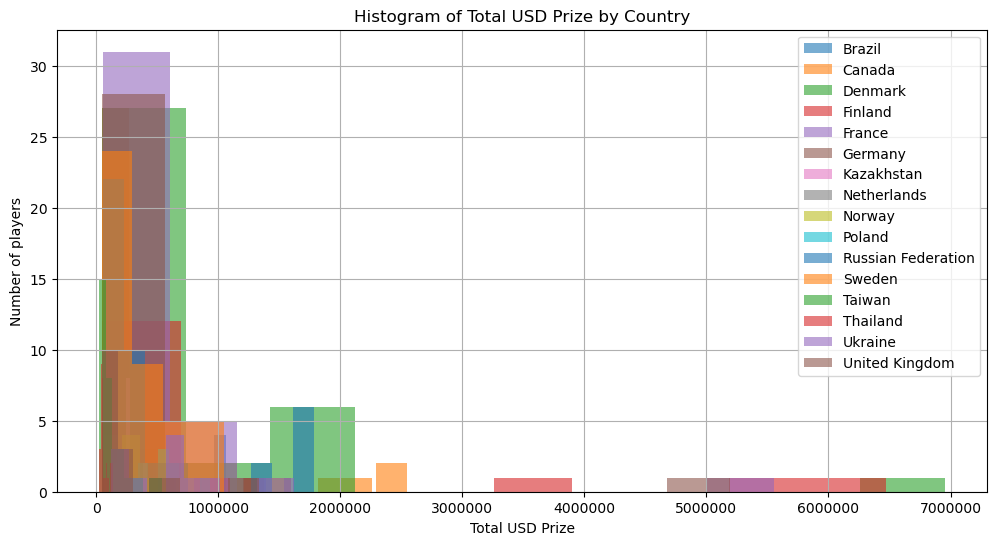

In [41]:
def format_x_axis(value, pos):
    return f'{value:.0f}'

plt.figure(figsize=(12, 6)) 
for country, data in filtered_players.groupby('Country_Name'):
    plt.hist(data['TotalUSDPrize'], alpha=0.6, bins=10, label=country)

plt.xlabel('Total USD Prize')
plt.ylabel('Number of players')
plt.title('Histogram of Total USD Prize by Country')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_x_axis))

plt.show()


<Figure size 4000x2000 with 0 Axes>

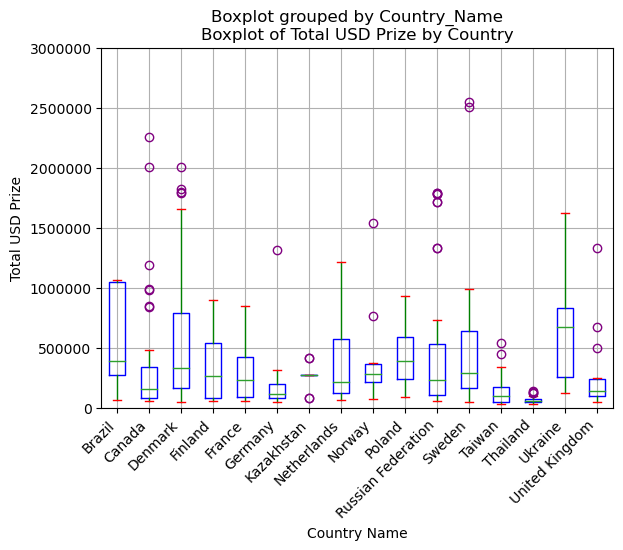

In [42]:
def format_y_axis(value, pos):
    return f'{value:.0f}'
plt.figure(figsize=(40, 20))
filtered_players.boxplot(column='TotalUSDPrize', by='Country_Name',
                                   boxprops=dict(color='blue'),
                                   whiskerprops=dict(color='green'),
                                   capprops=dict(color='red'),
                                   flierprops=dict(markeredgecolor='purple'))
plt.ylim(0, 3000000)
plt.xlabel('Country Name')
plt.ylabel('Total USD Prize')
plt.title('Boxplot of Total USD Prize by Country')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_y_axis))

plt.show()

In [43]:
model = ols('PlayerId ~ (Country_Name) + (TotalUSDPrize) +\
(Country_Name):(TotalUSDPrize)',
            data=filtered_players).fit()
result = sm.stats.anova_lm(model, type=2)
print(result)

                               df        sum_sq       mean_sq          F  \
Country_Name                 15.0  4.185145e+10  2.790097e+09   7.844605   
TotalUSDPrize                 1.0  7.223127e+09  7.223127e+09  20.308462   
Country_Name:TotalUSDPrize   15.0  1.745582e+10  1.163722e+09   3.271907   
Residual                    360.0  1.280415e+11  3.556708e+08        NaN   

                                  PR(>F)  
Country_Name                2.699548e-15  
TotalUSDPrize               8.923624e-06  
Country_Name:TotalUSDPrize  3.923140e-05  
Residual                             NaN  
